<a href="https://colab.research.google.com/github/prashant982/ML-Bike-Sharing-Demand-Prediction---Regression/blob/main/ML_Regression_Bike_Sharing_Demand_Prediction_revision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary**

This is a Regression Machine Learning project which aims to model the bike count required at each hour. We will be using Pandas, Numpy, Matplotlib for our data. For our machine learning models, we would be Linear Regression, Lasso Regression, Ridge Regression and Elastic Net to check which algorithm gives us the best results.

# **GitHub Link -**

https://github.com/prashant982/ML-Bike-Sharing-Demand-Prediction---Regression

# **Problem Statement**


Currently rental biks are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [402]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [403]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [404]:
file = '/content/drive/MyDrive/Colab Notebooks/Module/Project/Regression/SeoulBikeData.csv'

In [405]:
# Since there was an encoding error, used the following code to resolve it.
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-9',
 'confidence': 0.7583842623371586,
 'language': 'Turkish'}

In [406]:
dataset =  pd.read_csv(file, encoding='ISO-8859-9')

### Dataset First View

In [407]:
# Dataset First Look
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [408]:
# Dataset Rows & Columns count
rows = len(dataset.axes[0])
cols = len(dataset.axes[1])

print("Number of Rows: " + str(rows))
print("Number of Columns: " + str(cols))

Number of Rows: 8760
Number of Columns: 14


### Dataset Information

In [409]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [410]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

**There are no duplicates in the dataset.**

#### Missing Values/Null Values

In [411]:
# Missing Values/Null Values Count
dataset.isnull().sum().sort_values(ascending = False).head(30)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**There are no null values.**

<Axes: >

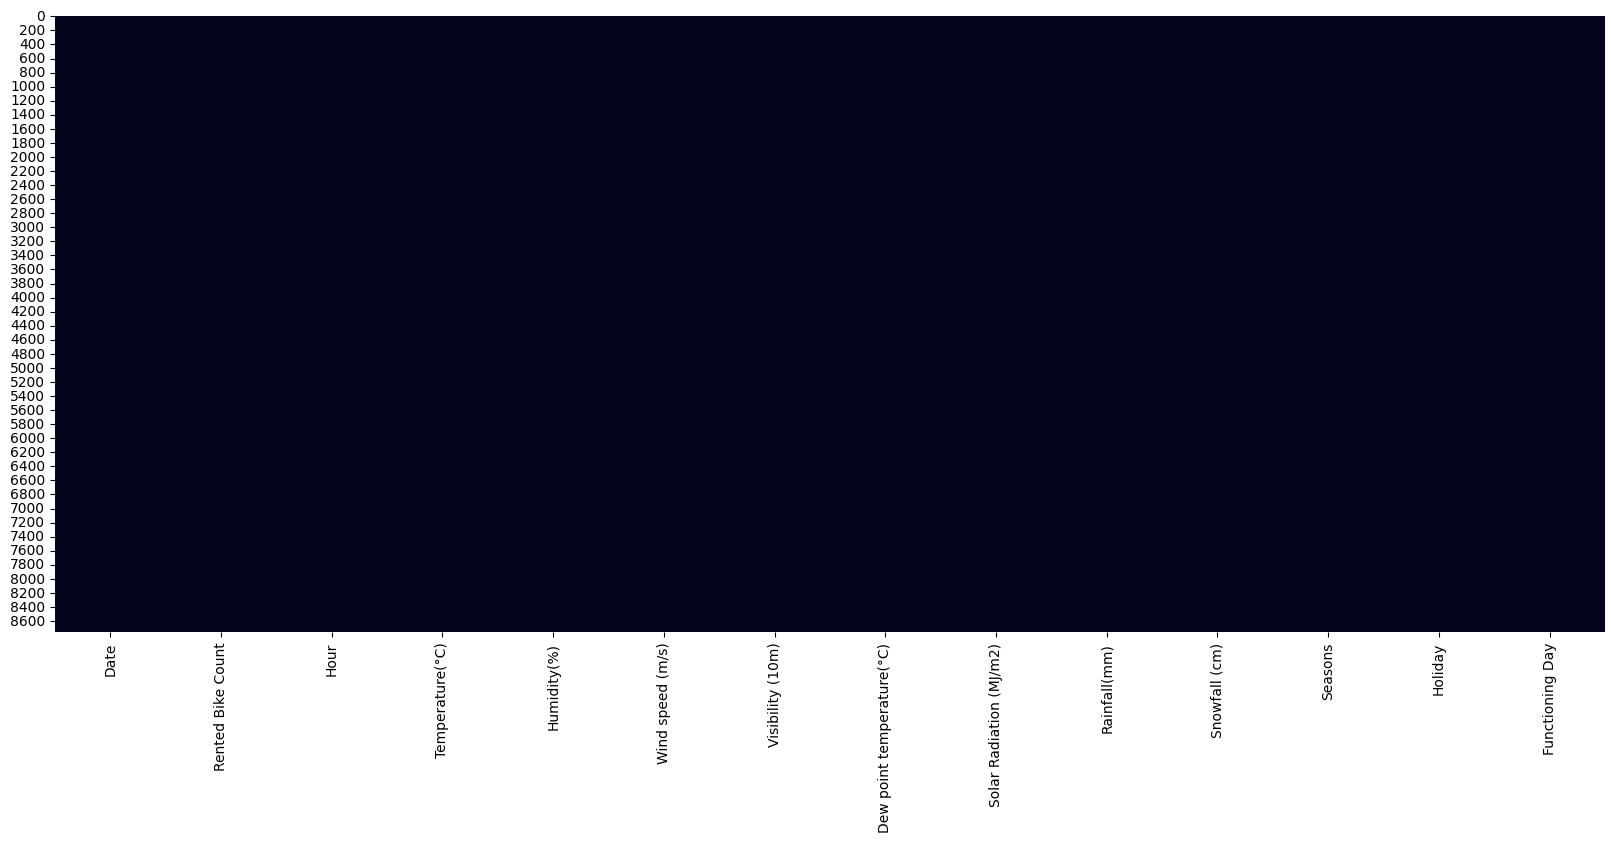

In [412]:
# Visualizing the missing values
plt.figure(figsize=(20,8))
sns.heatmap(dataset.isnull(), cbar=False)

**There are no null values therefore it is all black.**

### What did you know about your dataset?

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

## ***2. Understanding Your Variables***

In [413]:
# Dataset Columns
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [414]:
# Dataset Describe
dataset.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description


*   **Date** - Date
*   **Rented Bike Count** - Count of bikes rented at each hour
*   **Hour** - Hour of the day (0-23)
*   **Temperature** - Temperature of the day
*   **Humidity** - Humidity measure
*   **Windspeed** - Windspeed
*   **Visibility** - Visibility measure
*   **Dew Point Temperature** - Dew point temperature measure
*   **Solar Radiation** - Solar radiation measure
*   **Rainfall** - Rainfall in mm
*   **Snowfall** - Snowfall measure
*   **Seasons** - 1=Spring, 2=Summer, 3=Fall, 4=Winter
*   **Holiday** - Whether a holiday or not
*   **Functional Day** - Whether a functional day or not

### Check Unique Values for each variable.

In [415]:
# Check Unique Values for each variable.
pd.Series({col:dataset[col].unique() for col in dataset})

Date                         [01/12/2017, 02/12/2017, 03/12/2017, 04/12/201...
Rented Bike Count            [254, 204, 173, 107, 78, 100, 181, 460, 930, 4...
Hour                         [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
Temperature(°C)              [-5.2, -5.5, -6.0, -6.2, -6.4, -6.6, -7.4, -7....
Humidity(%)                  [37, 38, 39, 40, 36, 35, 27, 24, 21, 23, 25, 2...
Wind speed (m/s)             [2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 1.1, 0.5, ...
Visibility (10m)             [2000, 1928, 1996, 1936, 793, 1913, 1687, 1380...
Dew point temperature(°C)    [-17.6, -17.7, -18.6, -18.7, -19.5, -19.3, -19...
Solar Radiation (MJ/m2)      [0.0, 0.01, 0.23, 0.65, 0.94, 1.11, 1.16, 1.01...
Rainfall(mm)                 [0.0, 0.5, 1.0, 2.5, 0.1, 0.2, 0.3, 0.7, 1.6, ...
Snowfall (cm)                [0.0, 0.1, 0.3, 0.4, 0.2, 1.0, 0.9, 0.8, 0.7, ...
Seasons                                       [Winter, Spring, Summer, Autumn]
Holiday                                             

In [416]:
dataset.nunique().sort_values(ascending=True)

Holiday                         2
Functioning Day                 2
Seasons                         4
Hour                           24
Snowfall (cm)                  51
Rainfall(mm)                   61
Wind speed (m/s)               65
Humidity(%)                    90
Solar Radiation (MJ/m2)       345
Date                          365
Temperature(°C)               546
Dew point temperature(°C)     556
Visibility (10m)             1789
Rented Bike Count            2166
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [417]:
# Renaming the columns for easy comprehension
dataset = dataset.rename(columns={'Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Wind speed (m/s)':'Wind speed','Visibility (10m)':'Visibility','Solar Radiation (MJ/m2)':'Radiation','Dew point temperature(°C)':'Dew point temperature'})

In [418]:
# Changing the type of 'Hour' as we would be encoding the variable.
dataset=dataset.astype({'Hour':'object'})

In [419]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   object 
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Radiation              8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(3), object(5)
memory usage: 958.2+ 

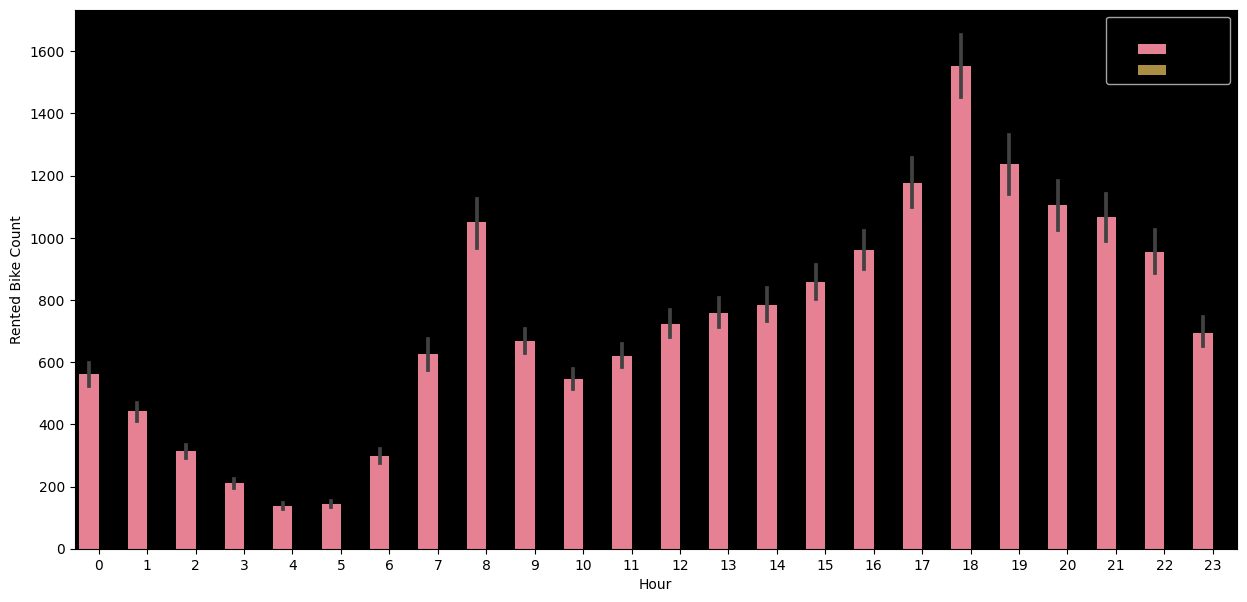

In [420]:
# Plotting for each functioning and non-functioning day. Hour vs Rented Bike Count
def barplots(x,y,hue):
    plt.figure(figsize=(15,7))
    sns.set_palette("husl")
    sns.barplot(x=x,y=y,hue=hue,data=dataset);
barplots('Hour','Rented Bike Count','Functioning Day')

In [421]:
# Grouping by Functioning Day and checking for Rented Bike Count.
dataset.groupby('Functioning Day').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Functioning Day,Rented Bike Count
0,Yes,6172314
1,No,0


We see that on a non-functioning day there are no rented bikes. So, we can remove those rows where **Functioning Day = No.**

In [422]:
dataset = dataset.drop(dataset[dataset['Functioning Day'] == 'No'].index)

Now, since we are only left with one value(i.e. Yes) in Functioning Day, we will remove this column.

In [423]:
dataset=dataset.drop(['Functioning Day'], axis = 1)

We are also dropping the **Date** column as it will be of no importance to us.

In [424]:
# Spliting Date column into Year, Month, Day

dataset['Date'] = dataset['Date'].apply(lambda x:
                                    dt.datetime.strptime(x,"%d/%m/%Y"))
dataset['year'] = dataset['Date'].dt.year
dataset['month'] = dataset['Date'].dt.month
dataset['day'] = dataset['Date'].dt.day_name()

In [425]:
dataset['weekdays_weekend']=dataset['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
dataset=dataset.drop(columns=['Date','day','year'],axis=1)

In [426]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented Bike Count      8465 non-null   int64  
 1   Hour                   8465 non-null   object 
 2   Temperature            8465 non-null   float64
 3   Humidity               8465 non-null   int64  
 4   Wind speed             8465 non-null   float64
 5   Visibility             8465 non-null   int64  
 6   Dew point temperature  8465 non-null   float64
 7   Radiation              8465 non-null   float64
 8   Rainfall               8465 non-null   float64
 9   Snowfall               8465 non-null   float64
 10  Seasons                8465 non-null   object 
 11  Holiday                8465 non-null   object 
 12  month                  8465 non-null   int64  
 13  weekdays_weekend       8465 non-null   int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 992.0+ 

### What all manipulations have you done and insights you found?


*   Changed the type of **Hour** since will be encoding the variable at a later stage.
*   Removed Functioning Day column because on a non-functioning day there were no bikes on rent. So, it is wise enough to remove those rows. And since we are left with only one value in Functioning Day column, we remove that column as well.
*   Renamed some column names for easy comprehension.
*   Split the Date Column into 3 - Day, Month and Year. Based on the Day, created a new column if the day is Weekend or not.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

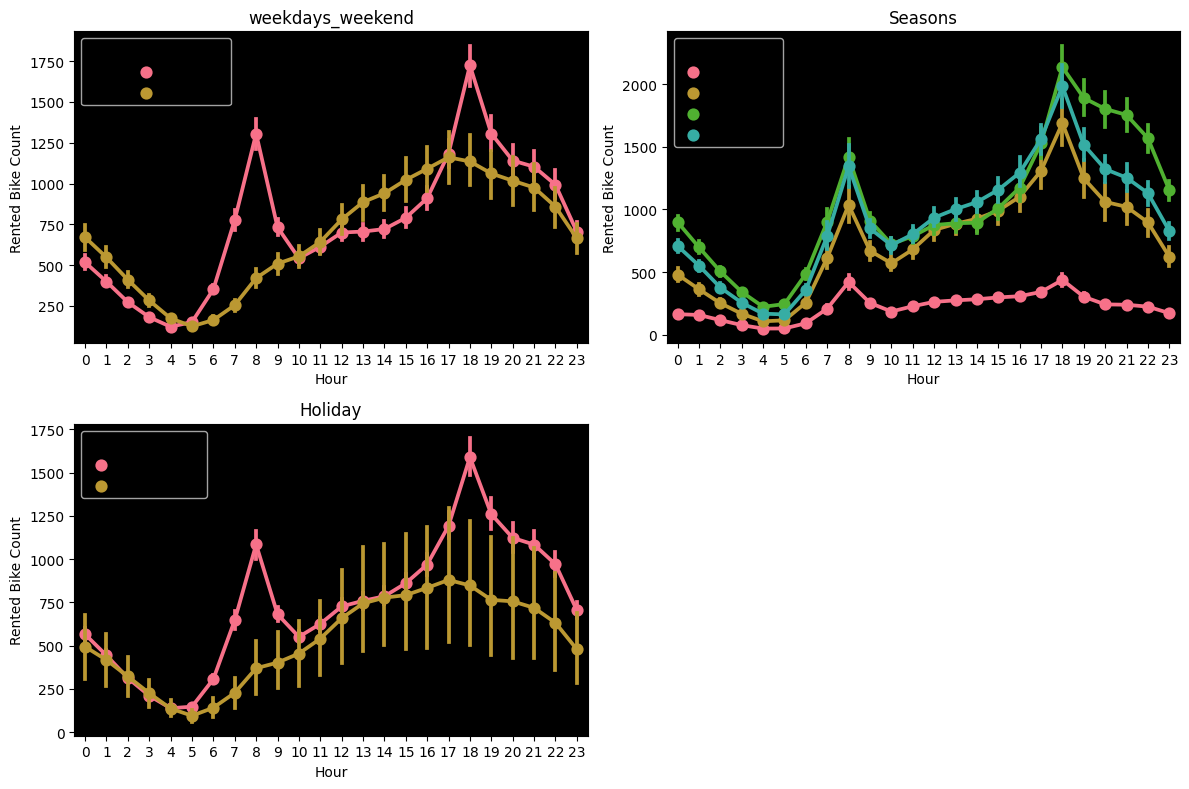

In [427]:
plt.figure(figsize=(12,8))
for n,col in enumerate(['weekdays_weekend','Seasons','Holiday']):
  plt.subplot(2,2,n+1)
  plt.title(col)
  sns.pointplot(data=dataset,x='Hour',y='Rented Bike Count',hue=col)
  plt.tight_layout();

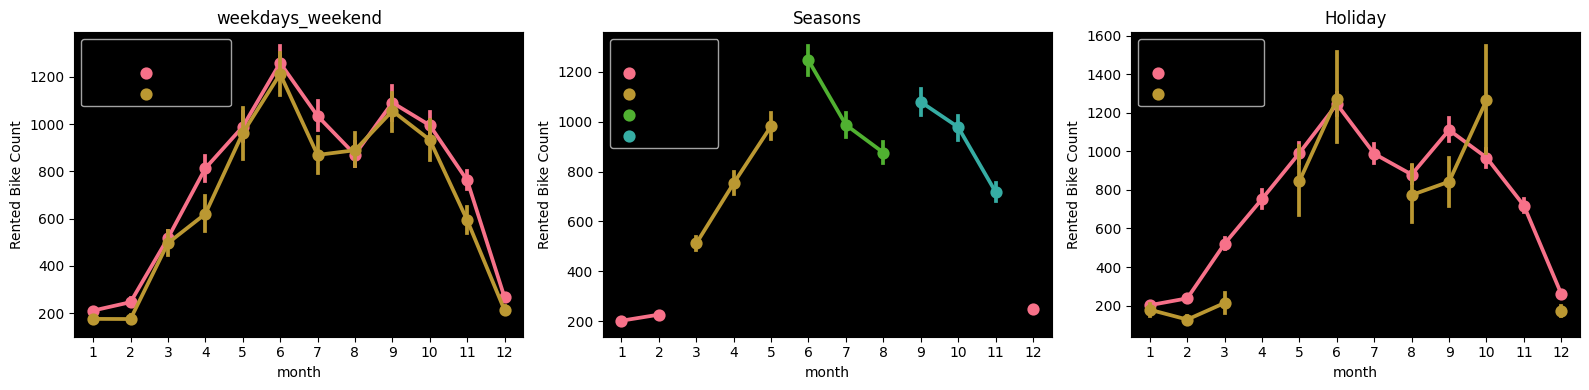

In [428]:
plt.figure(figsize=(16,4))
for n,col in enumerate(['weekdays_weekend','Seasons','Holiday']):
  plt.subplot(1,3,n+1)
  plt.title(col)
  sns.pointplot(data=dataset,x='month',y='Rented Bike Count',hue=col)
  plt.tight_layout();


In [429]:
categories = ['Hour', 'month', 'weekdays_weekend','Seasons','Holiday']

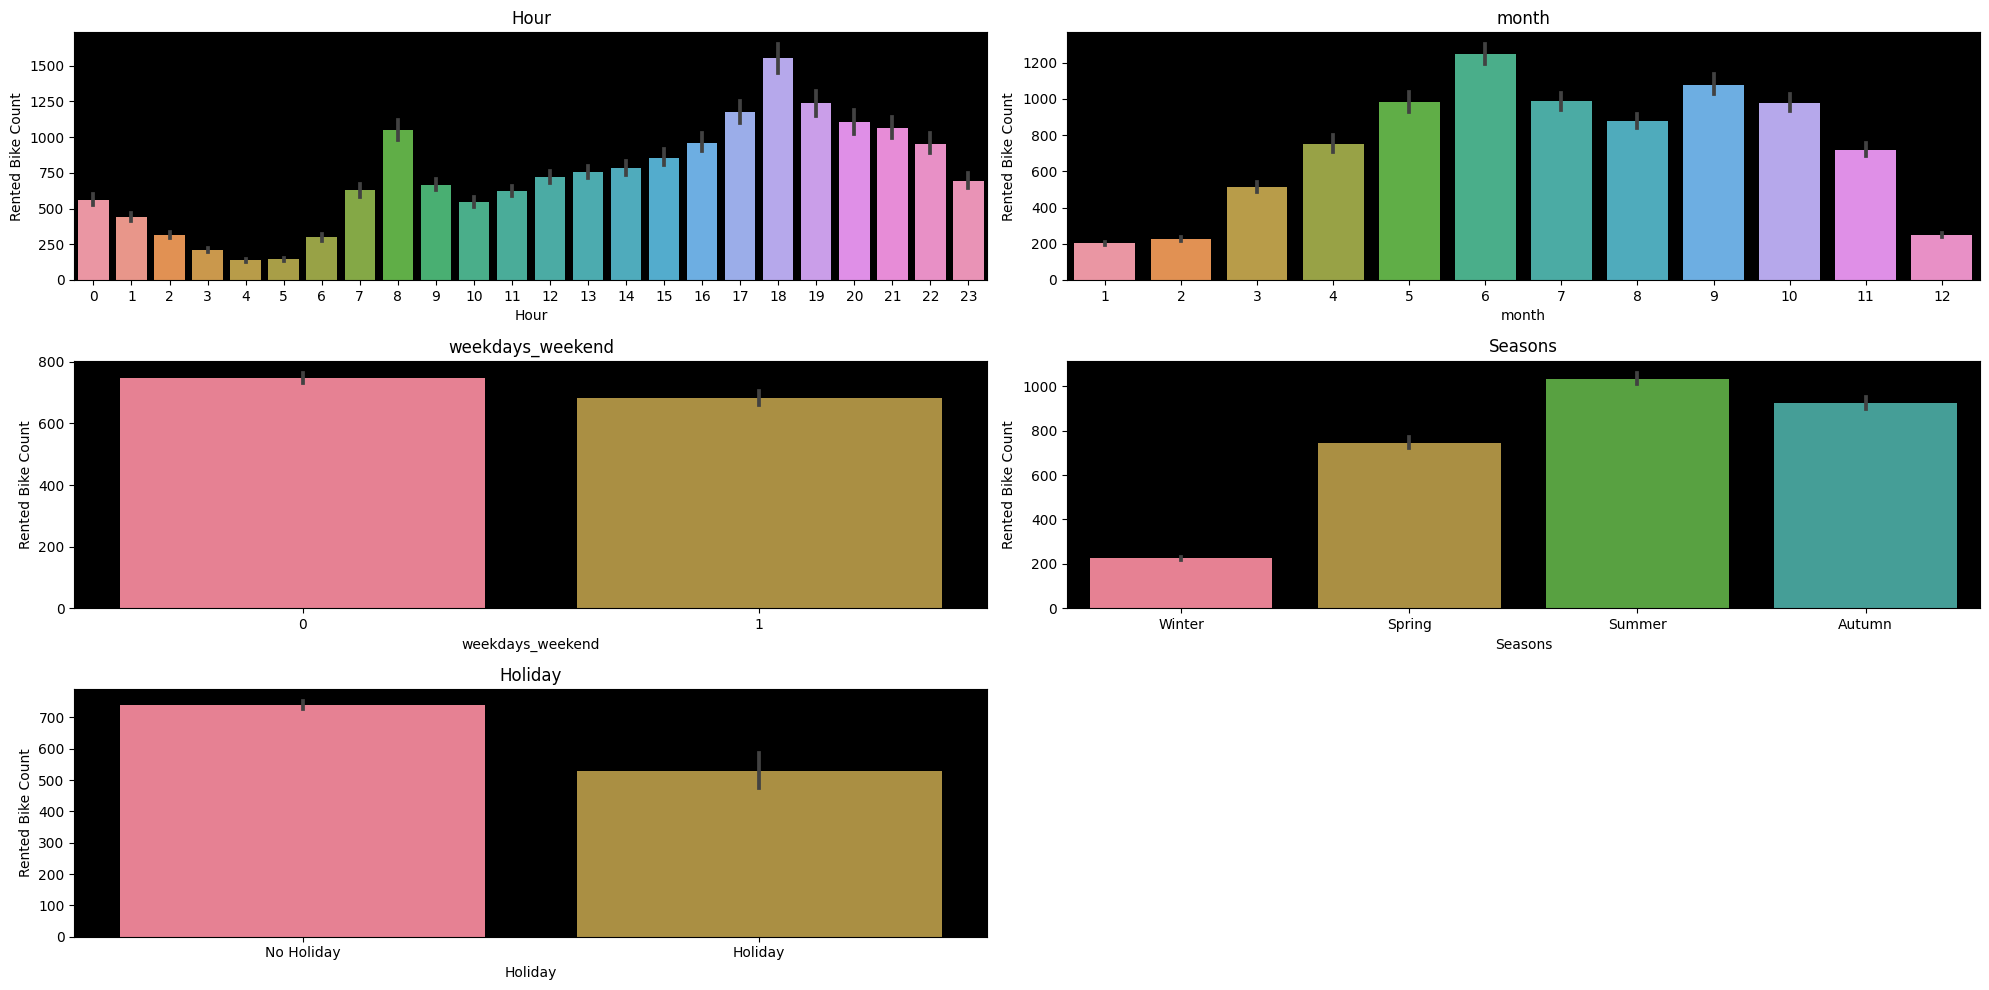

In [430]:
plt.figure(figsize=(20,10))
for n, col in enumerate(categories):
  plt.subplot(3,2,n+1)
  plt.title(col)
  sns.barplot(data=dataset, x=col, y='Rented Bike Count')
  plt.tight_layout();

In [431]:
# Storing numeric features separately
numeric_features = ['Temperature', 'Humidity', 'Wind speed',
       'Visibility', 'Dew point temperature', 'Radiation', 'Rainfall',
       'Snowfall']
numeric_features

['Temperature',
 'Humidity',
 'Wind speed',
 'Visibility',
 'Dew point temperature',
 'Radiation',
 'Rainfall',
 'Snowfall']

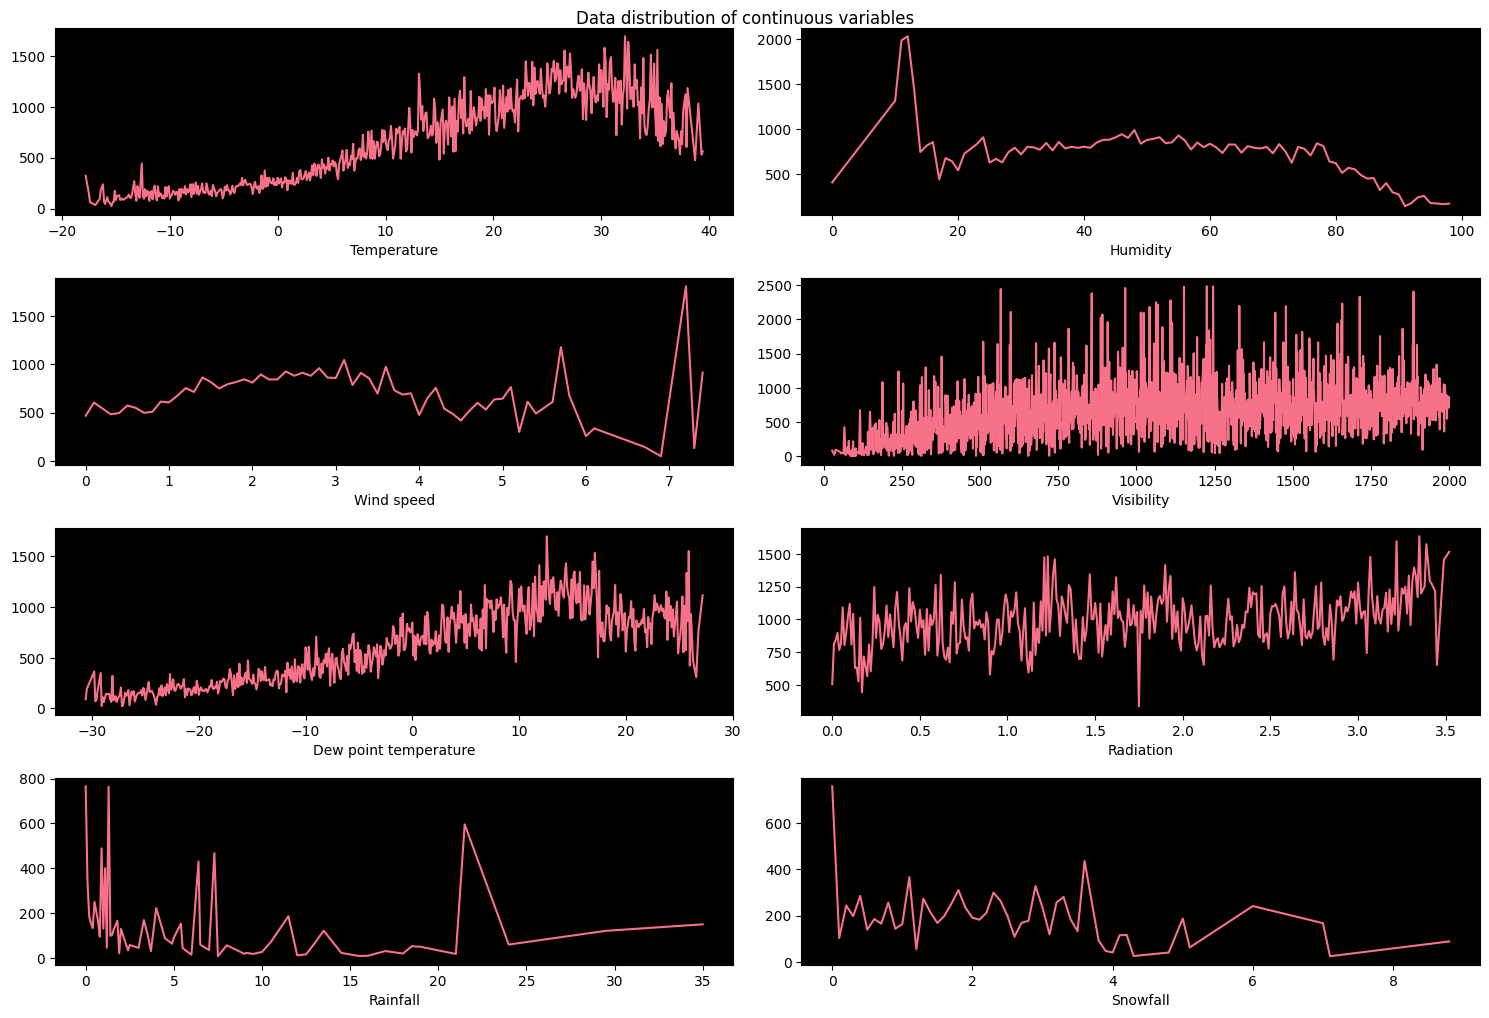

In [432]:
# Chart - 2 visualization code
plt.figure(figsize=(15,15))
for i, col in enumerate(numeric_features):
    ax = plt.subplot(6,2, i+1)
    dataset.groupby(col).mean()['Rented Bike Count'].plot();
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

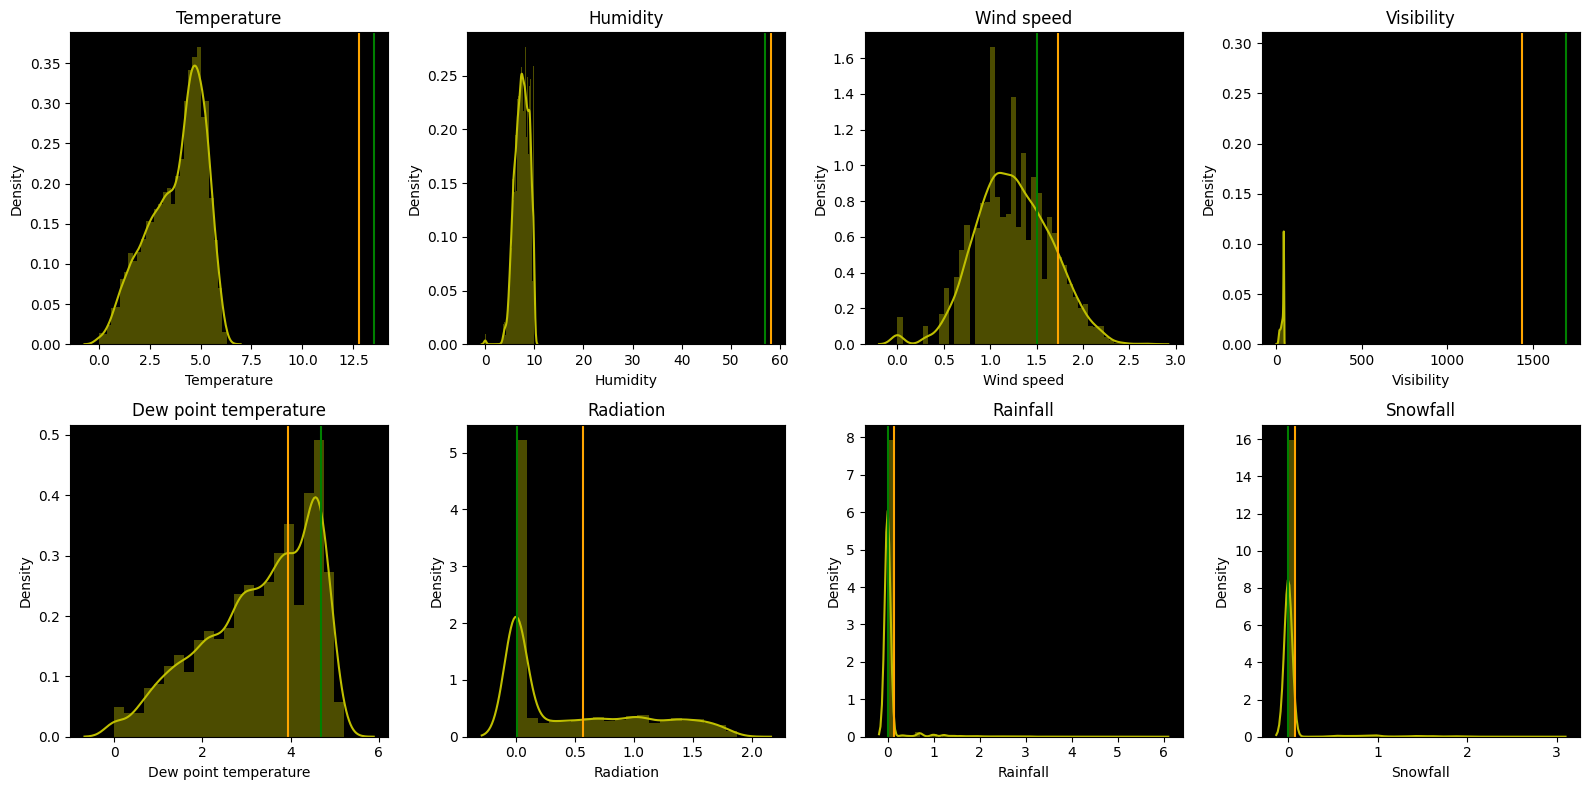

In [433]:
plt.figure(figsize=(16,8))
for n,col in enumerate(numeric_features):
  plt.subplot(2,4,n+1)
  plt.xlabel(col)
  plt.ylabel('Density')
  ax=sns.distplot(np.sqrt(dataset[col]),hist=True ,color="y")
  ax.axvline((dataset[col]).mean(),color='orange')
  ax.axvline((dataset[col]).median(),color='green')
  plt.title(col)
  plt.tight_layout();

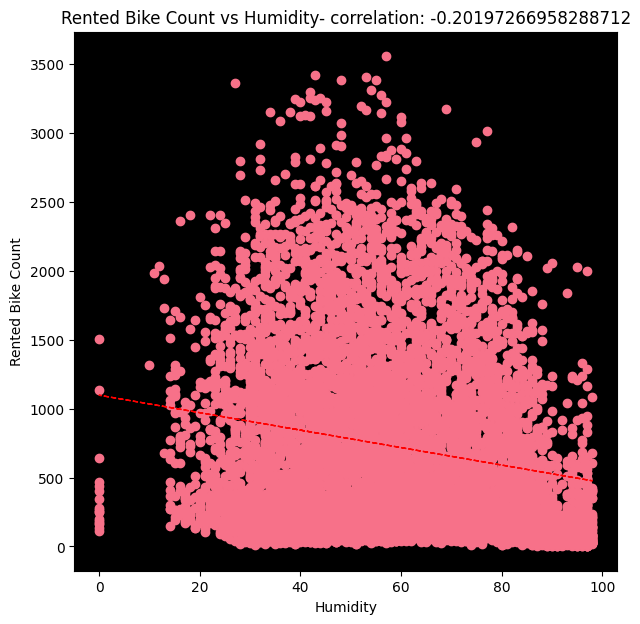

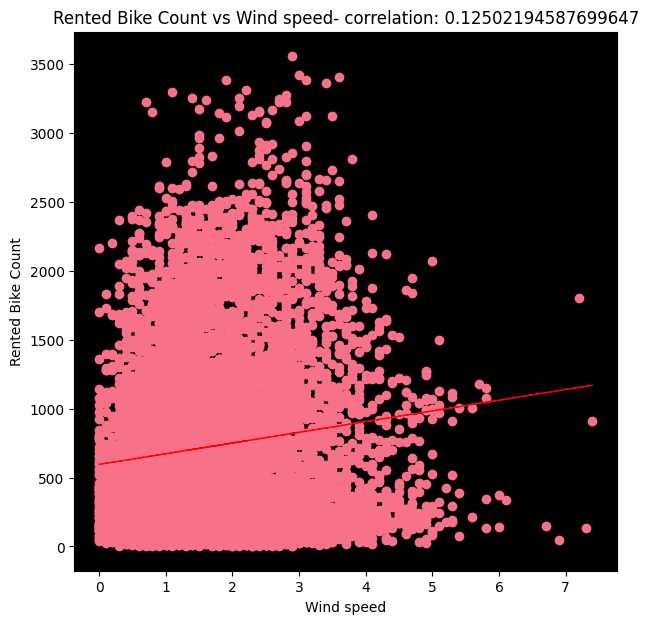

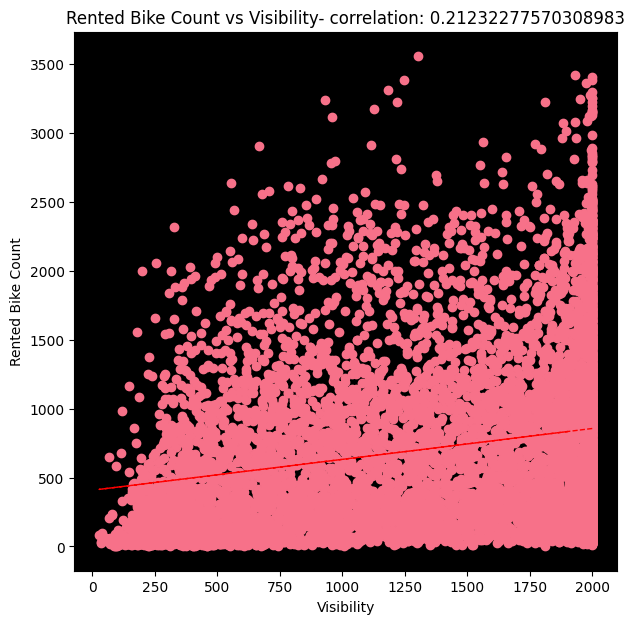

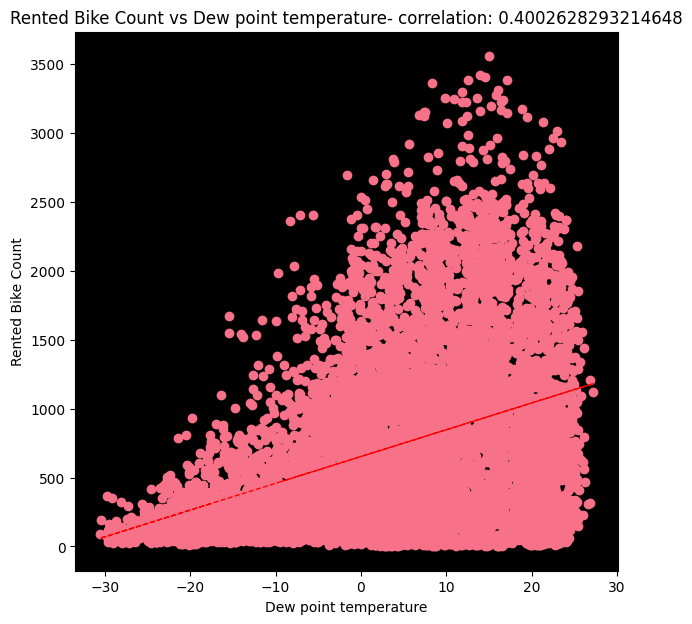

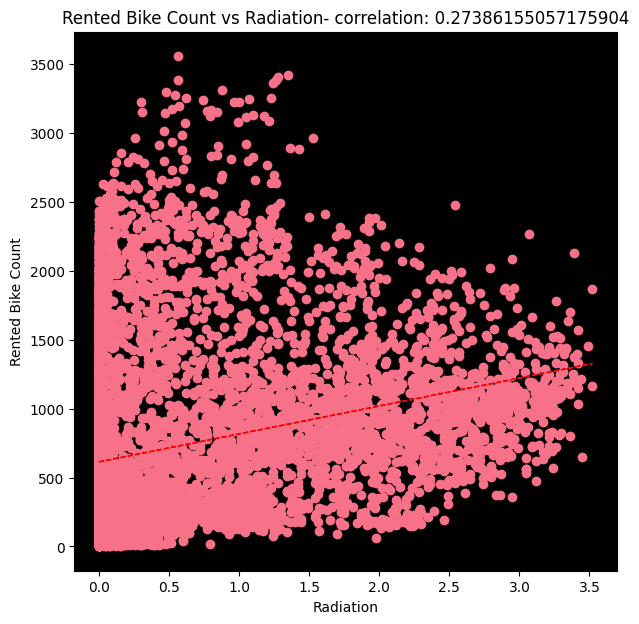

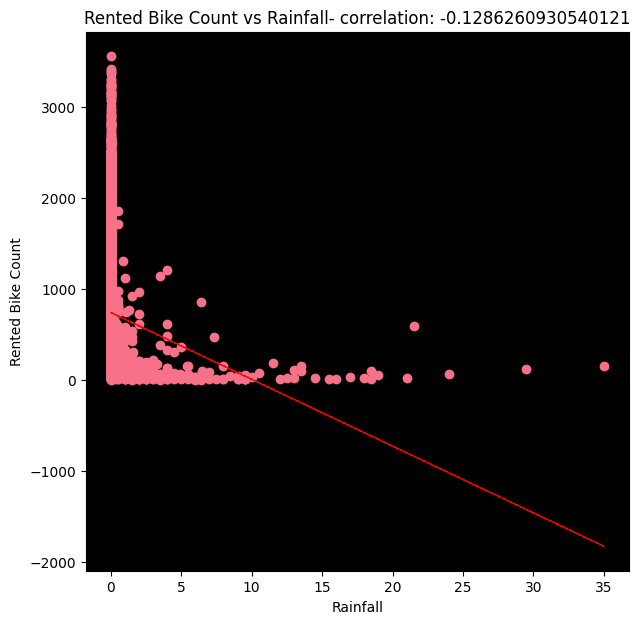

In [434]:

# Corelation Graph for each numeric feature vs. Rented Bike Count
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(7,7))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

From the above corelation charts, we can see that:


*   Hour, Temperature, Dew Point Temperature are somewhat(i.e. Corelation value is greater than 0.4) correlated to our dependent variable('Rented Bike Count').
*   Windspeed, Visibility, Solar Radiation, Day, Month are somewhat(i.e. Corelation value is lesser than 0.4) less corelated to our dependent variable('Rented Bike Count').
*   Humidity, Rainfall, Snowfall are negatively corelated to our dependent variable('Rented Bike Count').



Next, we will check for Multi-collinearity between our independent variables.

<Axes: >

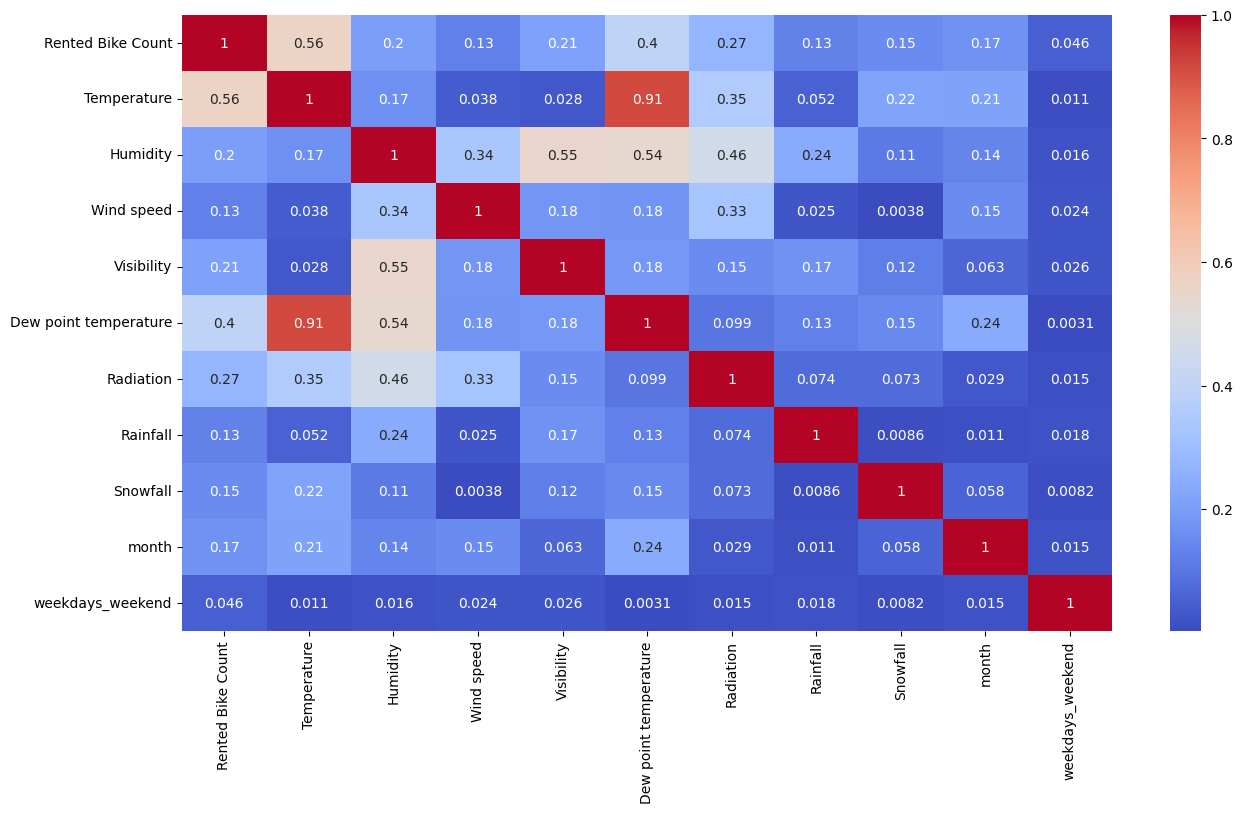

In [435]:

plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

From the above graph, we can see that Temperature and Dew Temperature are strongly (0.91) correlated to each other. We will need to do something about this.

In [436]:
# Storing categorical features separately
categorical_features = dataset.describe(include=['object','category']).columns
categorical_features

Index(['Hour', 'Seasons', 'Holiday'], dtype='object')

In [437]:
# Grouping by Seasons and checking Rented Bike Count based on various seasons
dataset.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending=False).reset_index()

,Seasons,Rented Bike Count
0,Summer,2283234
1,Autumn,1790002
2,Spring,1611909
3,Winter,487169


In [438]:
# Grouping by Holiday and checking Rented Bike Count based on holiday
dataset.groupby('Holiday').sum()['Rented Bike Count'].sort_values(ascending=False).reset_index()

,Holiday,Rented Bike Count
0,No Holiday,5956419
1,Holiday,215895


In [439]:
dataset.groupby('Hour').sum()['Rented Bike Count'].sort_values(ascending=False).reset_index()

,Hour,Rented Bike Count
0,18,548568
1,19,436229
2,17,415556
3,20,390172
4,21,376479
5,8,370731
6,16,339677
7,22,336821
8,15,302653
9,14,276971


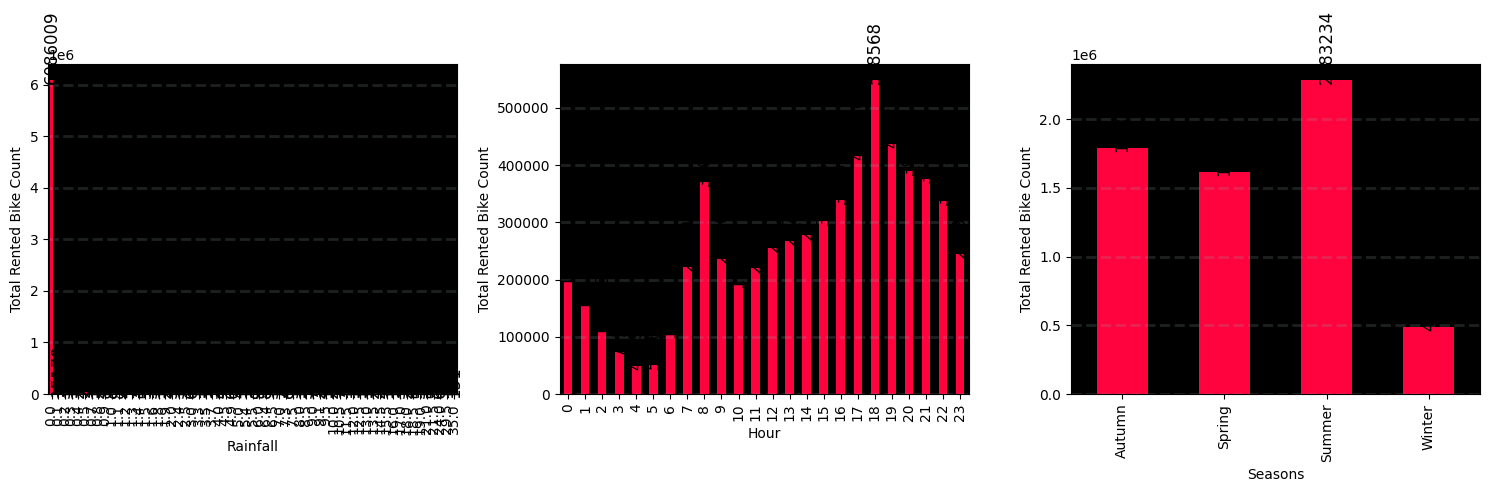

In [440]:

# Above data in a graphical form
fig = plt.figure(figsize = (15,5))
# feature = dataset[column]
for index,column in enumerate(categorical_features) :
    plt.subplot(1,3,index+1)
    dataset.groupby(feature)['Rented Bike Count'].sum().plot(kind='bar',color="#ff033e")
    feature = dataset[column]
    ax = fig.gca()
    plt.ylabel('Total Rented Bike Count')
    plt.tight_layout()
    plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
    for p in ax.patches:
        ax.annotate(round(p.get_height()),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12, rotation=90)

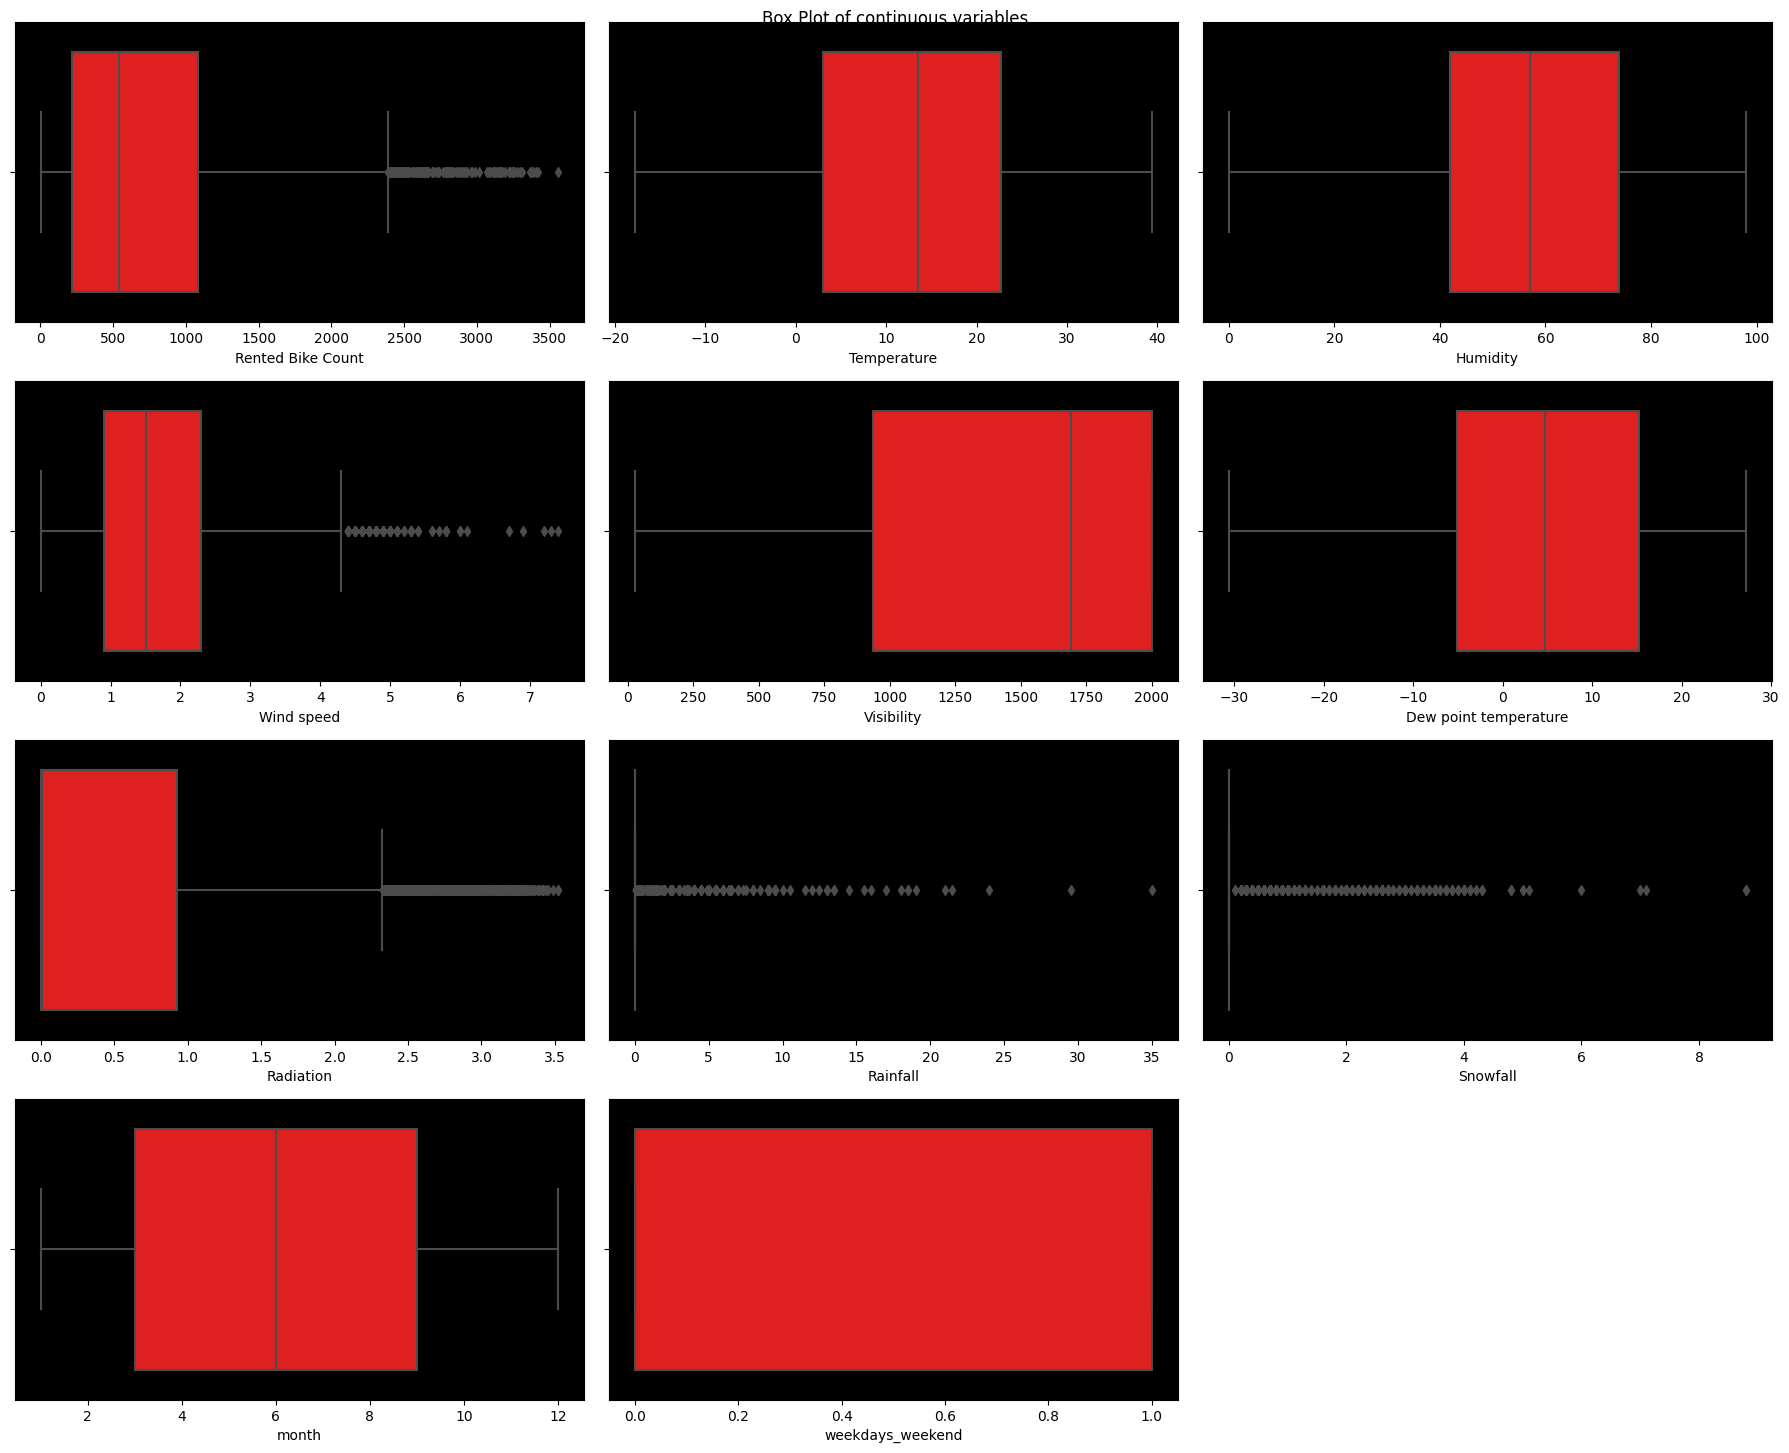

In [441]:

# Checking for Outliers using BoxPlot
plt.figure(figsize=(18, 18))
for i, col in enumerate(dataset.select_dtypes(include=['float64','int64']).columns):
    # plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,3,i+1)
    sns.boxplot(data=dataset, x=col, ax=ax,color='red')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

From the above boxplots we can see that there are many variables with outliers. We will treat the outliers in the later section.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

There are no missing values. It is a very clean data. We don't need to do anything.

### 2. Handling Outliers & Applying Transformation

Remember, we have skewness in our data as seen from the charts previously. Also, above we see that there are outliers. So, we needed to fix it before proceeding.
Here, we are using PowerTransformer.
Power transfom is a family of functions that transform data using power laws. The idea is to apply a transformation to each feature of our dataset.
What’s the purpose of a power transform? The idea is to increase the symmetry of the distribution of the features. If a features is asymmetric, applying a power transformation will make it more symmetric.
The most common power transformations are the **Box-Cox** and the **Yeo-Johnson** transformations.
* **Box-Cox Transformation: Can be used be used on positive values only**
* **Yeo-Johnson Transformation: Can be used on both positive and negative values**

Here we are using  **Yeo-Johnson Transformation**

In [442]:
from sklearn.preprocessing import PowerTransformer
sc_X=PowerTransformer(method = 'yeo-johnson')
dataset[numeric_features]=sc_X.fit_transform(dataset[numeric_features])

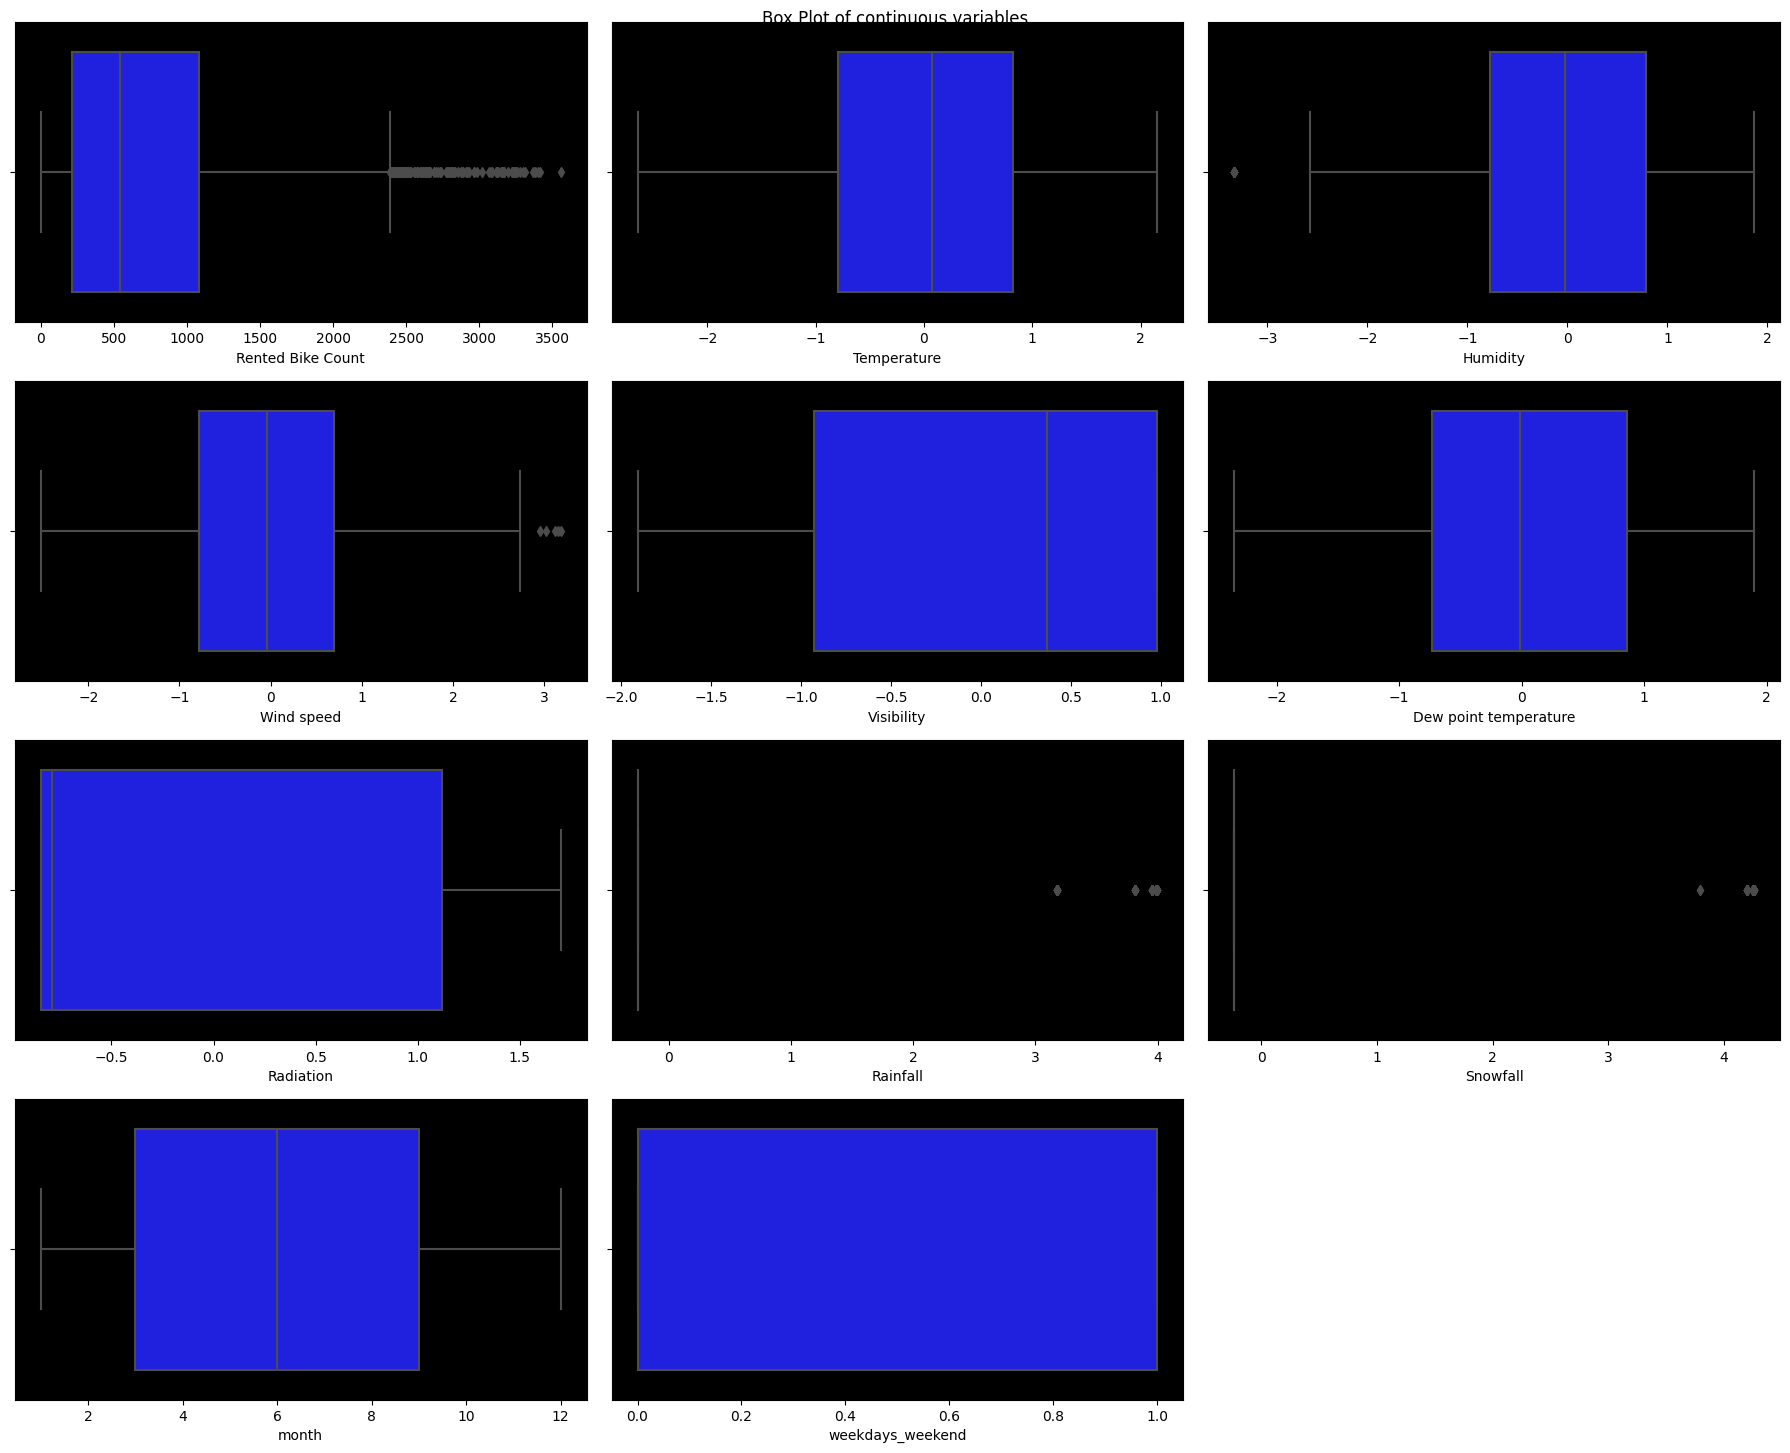

In [443]:
# Chart - 8
# Checking again for Outliers with the Box Plot
plt.figure(figsize=(18, 18))
for i, col in enumerate(dataset.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,3,i+1)
    sns.boxplot(data=dataset, x=col, ax=ax,color='blue')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

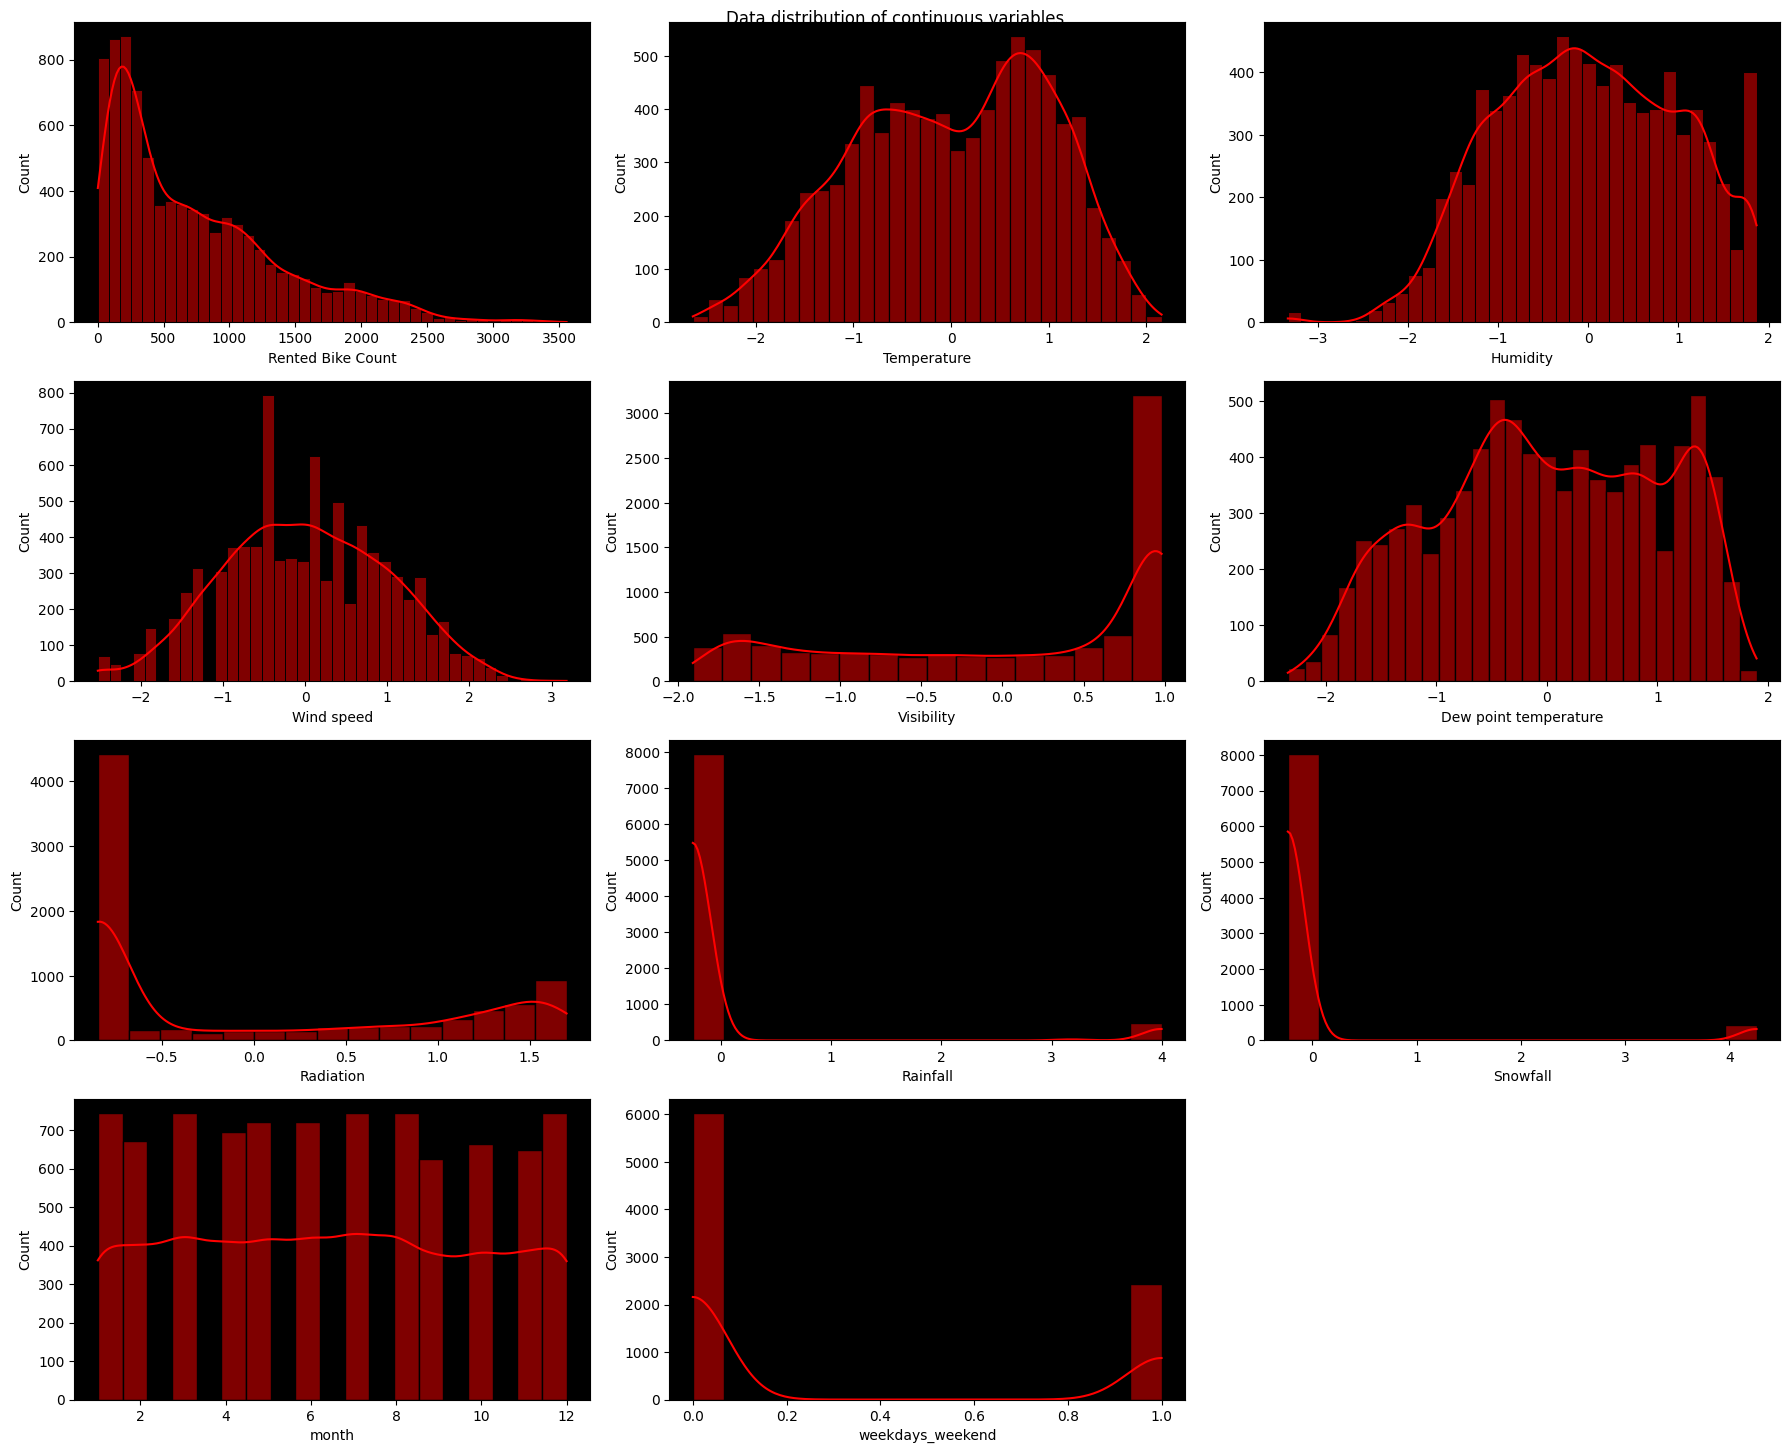

In [444]:
# Chart - 9
plt.figure(figsize=(18, 18))
for i, col in enumerate(dataset.select_dtypes(include=['float64','int64']).columns):
    # plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,3, i+1)
    sns.histplot(data=dataset, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

After applying the Transformation, we can see that the outliers has been taken care of and data are now less skewed when compared to raw data.

#### 3. Handling Multicollinearity

From the Multicollinearity heatmap, we remember that Temperature and Dew Point Temperature had collinearity of 0.91.
We will check the VIF for all the variables.

In [445]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [446]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Temperature,48.111767
1,Humidity,12.376690
2,Wind speed,1.236073
3,Visibility,1.584094
4,Dew point temperature,63.461511
5,Radiation,1.845320
6,Rainfall,1.196471
7,Snowfall,1.173708
8,month,1.339344
9,weekdays_weekend,1.318889


From VIF table, Dew point temperature is highly correlated.

In [447]:
dataset1 = dataset.copy()
dataset2 = dataset.copy()

In [448]:
del dataset1['Dew point temperature']

In [449]:
calc_vif(dataset1[[i for i in dataset1.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Temperature,1.580059
1,Humidity,2.451162
2,Wind speed,1.235962
3,Visibility,1.517737
4,Radiation,1.814649
5,Rainfall,1.195761
6,Snowfall,1.168861
7,month,1.339312
8,weekdays_weekend,1.313334


After removing Dew point temperature from our dataset, we can observe that the VIF for all the variables are less than 10 which is in our limit.

We can also, assign different weights to Temperature and Dew point temperature and combine them in a single variable. In this way, we can use both the variable rather than discarding another.
We will check after combining if the VIF is below 10 or else we will go with the first option.

In [450]:
dataset2['CalcTemperature'] = 0.7*dataset2['Temperature'] + 0.3*dataset2['Dew point temperature']

In [451]:
del dataset2['Dew point temperature']
del dataset2['Temperature']

In [452]:
calc_vif(dataset2[[i for i in dataset2.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Humidity,2.673471
1,Wind speed,1.235885
2,Visibility,1.524004
3,Radiation,1.802400
4,Rainfall,1.195802
5,Snowfall,1.165844
6,month,1.339237
7,weekdays_weekend,1.313615
8,CalcTemperature,1.659637


We can observe that VIF of our new variable CalcTemperature which is the combination of two other variables Temperature and Dew Point Temperature is less than 10. So, we will go with this option.

We will make the necessary changes in the original dataset that we were working with.

In [453]:
dataset['CalcTemperature'] = 0.7*dataset['Temperature'] + 0.3*dataset['Dew point temperature']

In [454]:
del dataset['Dew point temperature']
del dataset['Temperature']

In [455]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Humidity,2.673471
1,Wind speed,1.235885
2,Visibility,1.524004
3,Radiation,1.802400
4,Rainfall,1.195802
5,Snowfall,1.165844
6,month,1.339237
7,weekdays_weekend,1.313615
8,CalcTemperature,1.659637


<Axes: >

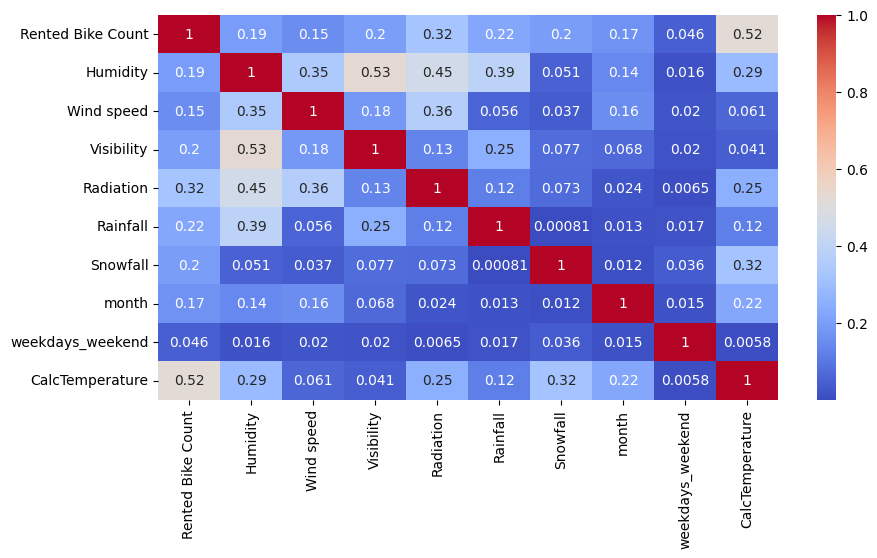

In [456]:
plt.figure(figsize=(10,5))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

### 3. Categorical Encoding

In [457]:
# Encode your categorical columns
dataset3 = dataset.copy()

In [458]:
categorical_features

Index(['Hour', 'Seasons', 'Holiday'], dtype='object')

In [459]:
# One Hot Encoding
dataset3 = pd.get_dummies(dataset3, columns=['Seasons', 'Holiday', 'Hour','month','weekdays_weekend'])
dataset3.head()

,Rented Bike Count,Humidity,Wind speed,Visibility,Radiation,Rainfall,Snowfall,CalcTemperature,Seasons_Autumn,Seasons_Spring,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_0,weekdays_weekend_1
0,254,-1.027972,0.617757,0.981112,-0.845933,-0.254376,-0.234989,-1.513151,0,0,...,0,0,0,0,0,0,0,1,1,0
1,204,-0.975760,-0.927888,0.981112,-0.845933,-0.254376,-0.234989,-1.531942,0,0,...,0,0,0,0,0,0,0,1,1,0
2,173,-0.923788,-0.643857,0.981112,-0.845933,-0.254376,-0.234989,-1.565189,0,0,...,0,0,0,0,0,0,0,1,1,0
3,107,-0.872048,-0.782078,0.981112,-0.845933,-0.254376,-0.234989,-1.575858,0,0,...,0,0,0,0,0,0,0,1,1,0
4,78,-1.080433,0.700049,0.981112,-0.845933,-0.254376,-0.234989,-1.582159,0,0,...,0,0,0,0,0,0,0,1,1,0


In [460]:
dataset = dataset3.copy()

#### What all categorical encoding techniques have you used & why did you use those techniques?

Since there are only 3 categorical features, I have used only One Hot Encoding.
One Hot Encoding creates new columns as much as the number of unique values.
One Hot Encoding makes our training data more useful and expressive, and it can be rescaled easily.
The reason for Encoding **Hour** column is that higher values can effect our dependent variable more and it will not be fair.

### 4. Feature Selection

---



##### Which all features you found important and why?

We have seen earlier from the Correlation Heatmap that Temperature and Dew Point Temperature were correlated. We also saw it from the VIF chart.
We have created a new variable called as CalcTemperature which is the combination of Temperature and Dew Point Temperature. Subsequently, we deleted the features Temperature and Dew Point Temperature.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction refers to techniques for reducing the number of input variables in training data. It simply refers to the process of reducing the number of attributes in a dataset while keeping as much of the variation in the original dataset as possible.

Here, Dimesionality Reduction since there are only limited number of features and there is no multi-collinearity between them.

### 8. Data Splitting

In [461]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rented Bike Count   8465 non-null   int64  
 1   Humidity            8465 non-null   float64
 2   Wind speed          8465 non-null   float64
 3   Visibility          8465 non-null   float64
 4   Radiation           8465 non-null   float64
 5   Rainfall            8465 non-null   float64
 6   Snowfall            8465 non-null   float64
 7   CalcTemperature     8465 non-null   float64
 8   Seasons_Autumn      8465 non-null   uint8  
 9   Seasons_Spring      8465 non-null   uint8  
 10  Seasons_Summer      8465 non-null   uint8  
 11  Seasons_Winter      8465 non-null   uint8  
 12  Holiday_Holiday     8465 non-null   uint8  
 13  Holiday_No Holiday  8465 non-null   uint8  
 14  Hour_0              8465 non-null   uint8  
 15  Hour_1              8465 non-null   uint8  
 16  Hour_2

In [462]:
# X is the independent variables. y is the dependent variable.
X=dataset.iloc[:,1:]
y=dataset.iloc[:,0]

In [463]:
X_columns = X.columns


In [464]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)

print(X_test.shape)

(6772, 51)
(1693, 51)


##### What data splitting ratio have you used and why?

The dataset has been split in the ratio of 80% and 20%. 80% to the training dataset and 20% to the test dataset.
80/20 ratio is quite a commononly occuring ratio and is often referred to as **Pareto Principle**. It is usually a safe bet if we use that ratio.

#### 6. Data Scaling

Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.

Normalization and Standardization

The point of normalization is to change your observations so that they can be described as a normal distribution.
Standardization (also called z-score normalization) transforms your data such that the resulting distribution has a mean of 0 and a standard deviation of 1.

Since our data is normally distributed, we will be using Standardisation.

In [465]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

I have used fit_transform() for our training data and transform() for our test data.
fit_transform() is used so that we can learn the scaling parameters of our data. It learns means and variance of the training set and then it applies the same on the test set.
Using the transform() method, we use the same mean and variance as it is calculated above and try to scale the test data.

In [466]:
X_train = pd.DataFrame(X_train,columns=X_columns)
X_test = pd.DataFrame(X_test,columns=X_columns)

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

The data is not imbalanced. Because this is a regression problem we cannot classify the dataset as imbalanced.

## ***6. ML Model Implementation***

In [467]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [468]:
def metric_value(model,x_train,y_train,x_test,y_test):
    #get the y predicted value for train and test dataset
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    #Calculating metric value for training dataset
    #Calculate MSE
    # MSE = mean_squared_error(y_train, y_pred_train)
    # #calculate RMSE
    # RMSE = np.sqrt(MSE)
    # #calculate MAE
    # MAE = mean_absolute_error(y_train, y_pred_train)
    #calculate r2 and adjusted r2
    r2 = r2_score(y_train, y_pred_train)
    Adjusted_r2 = 1-(((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
    #creating table of metric values
    # data_set = [['MAE',round((MAE),3)],['MSE',round((MSE),3)],
    #             ['RMSE',round((RMSE),3)],['R2_score',round((r2),3)],['Adjusted R2',round((Adjusted_r2),3)]]
    data_set = [['R2_score',round((r2),3)],['Adjusted R2',round((Adjusted_r2),3)]]
    training_df = pd.DataFrame(data_set, columns=['metrics','train_values'])

    #Calculating metric value for testing dataset
    #calculate MSE
    # MSE = mean_squared_error(y_test, y_pred_test)
    # #calculate RMSE
    # RMSE = np.sqrt(MSE)
    # #calculate MAE
    # MAE = mean_absolute_error(y_test, y_pred_test)
    #calculate r2 and adjusted r2
    r2 = r2_score(y_test, y_pred_test)
    Adjusted_r2 = 1-(((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
    #creating table of metric values
    # data_set = [['MAE',round((MAE),3)],['MSE',round((MSE),3)],
    #             ['RMSE',round((RMSE),3)],['R2_score',round((r2),3)],['Adjusted R2',round((Adjusted_r2),3)]]
    data_set = [['R2_score',round((r2),3)],['Adjusted R2',round((Adjusted_r2),3)]]
    testing_df = pd.DataFrame(data_set, columns=['metrics','test_values'])

    metric_values = training_df.merge(testing_df,how='inner', on='metrics')
    print(metric_values)

    plt.figure(figsize=(4,4))
    ax = metric_values.plot(kind='bar', x='metrics', rot=0)
    plt.title(model)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show();

    plt.figure(figsize=(12,3))
    plt.plot((y_pred_test)[:100])
    plt.plot((np.array(y_test)[:100]))
    plt.legend(["Predicted","Actual"])
    plt.title('Actual and Predicted Bike Counts')
    plt.show();

    try:
      if model == xgb_model:
        result=pd.DataFrame()
        model = [Linear_Regression,ridge_regression,model,rf_model,gradient_boosting_regressor,xgb_model]
        for i in model:
          result = result.append(metric_values[i],ignore_index=True)
        print(result)
    except:
      pass

### ML Model - 1 - Linear Regression

In [469]:
from sklearn.linear_model import LinearRegression
Linear_Regression = LinearRegression()
Linear_Regression.fit(X_train,y_train)

LinearRegression()

       metrics  train_values  test_values
0     R2_score         0.737        0.707
1  Adjusted R2         0.728        0.698


<Figure size 400x400 with 0 Axes>

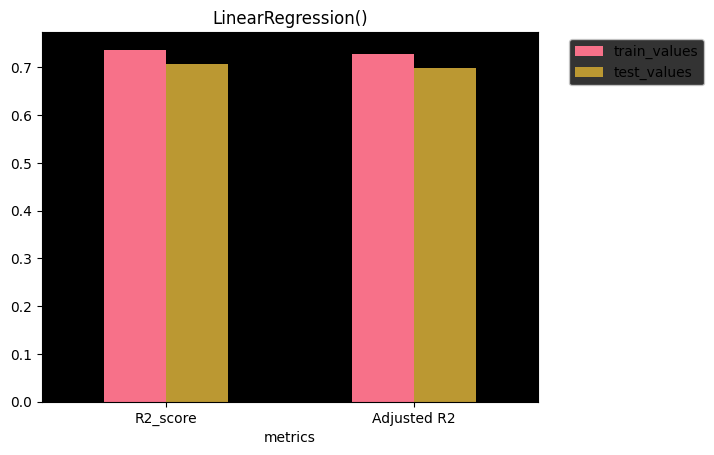

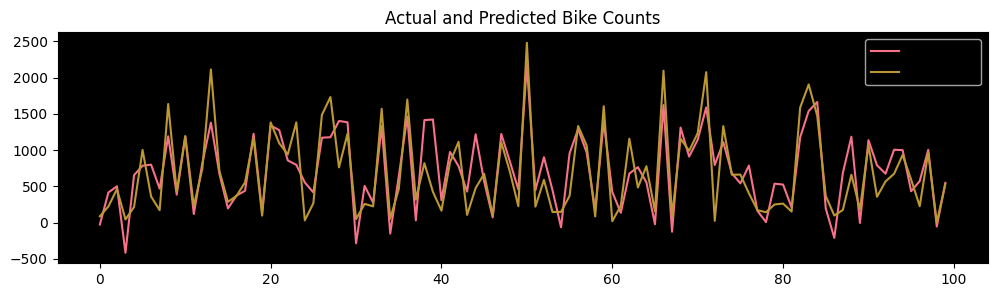

In [470]:
metric_value(Linear_Regression,X_train,y_train,X_test,y_test)

There has been a negligible improvement when using Linear Regression with Cross-Validation.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [471]:
from sklearn.linear_model import Ridge,Lasso

In [472]:
# ML Model - 2 Implementation
# Fit the Algorithm

lasso_reg = Lasso().fit(X_train, y_train)
lasso_reg.fit(X_train,y_train)

Lasso()

       metrics  train_values  test_values
0     R2_score         0.736        0.707
1  Adjusted R2         0.728        0.698


<Figure size 400x400 with 0 Axes>

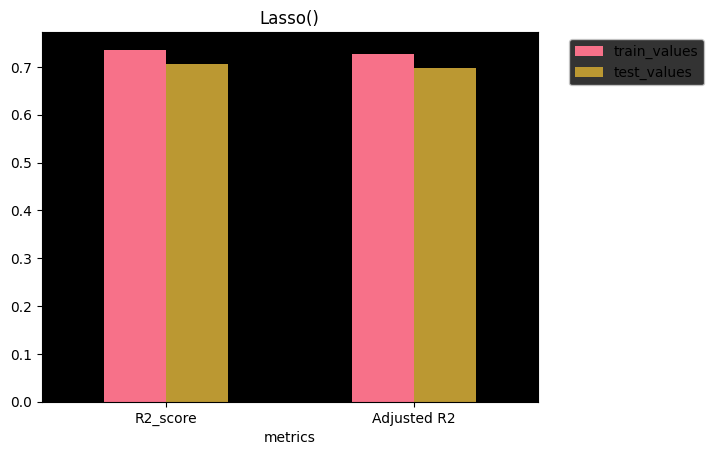

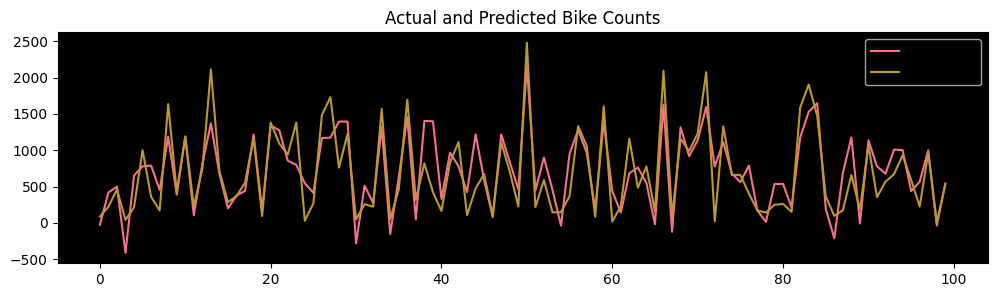

In [473]:
metric_value(lasso_reg,X_train,y_train,X_test,y_test)

In [474]:
# Lasso Regression with GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
grid_lasso = GridSearchCV(Lasso(), param_grid = parameters, cv=10, scoring='r2', verbose=1)
grid_lasso.fit(X_train, y_train)

Fitting 10 folds for each of 21 candidates, totalling 210 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='r2', verbose=1)

       metrics  train_values  test_values
0     R2_score         0.737        0.707
1  Adjusted R2         0.728        0.698


<Figure size 400x400 with 0 Axes>

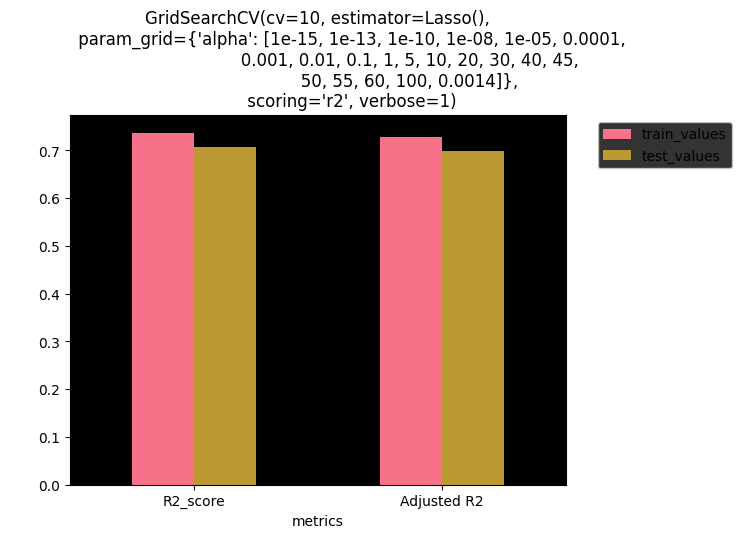

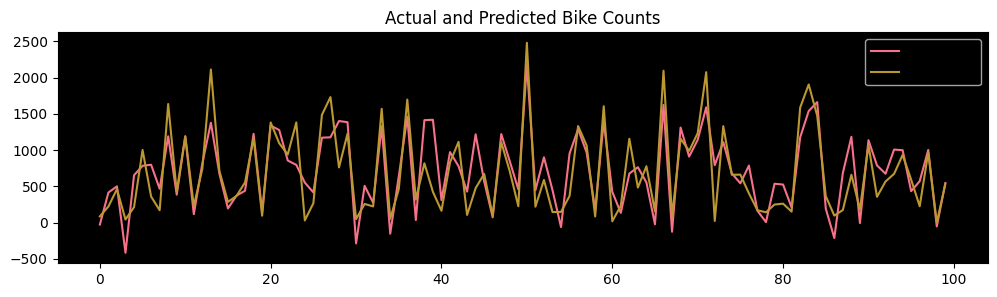

In [475]:
metric_value(grid_lasso,X_train,y_train,X_test,y_test)

### ML Model - 3

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [476]:
# ML Model - 3 Implementation
# Fit the Algorithm

ridge_reg = Ridge().fit(X_train, y_train)
ridge_reg
# Predict on the model
# y_pred_ridge_reg = ridge_reg.predict(X_test)
# lasso_reg = Lasso().fit(X_train, y_train)
# lasso_reg.fit(X_train,y_train)

Ridge()

       metrics  train_values  test_values
0     R2_score         0.737        0.707
1  Adjusted R2         0.728        0.698


<Figure size 400x400 with 0 Axes>

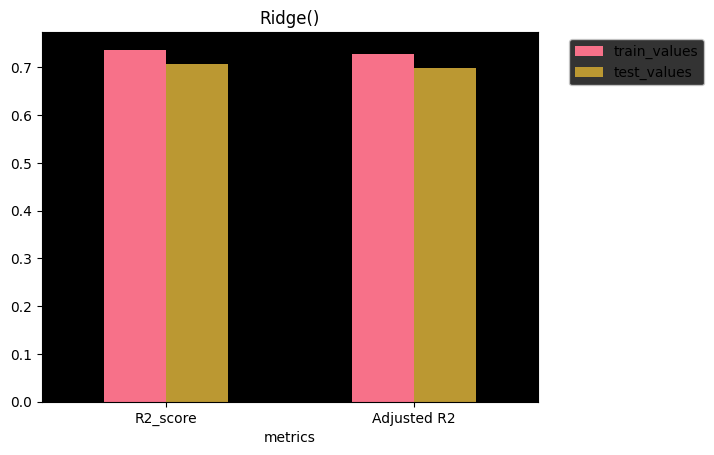

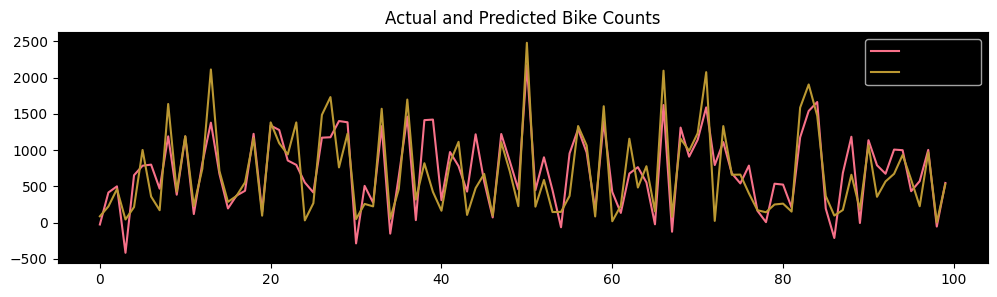

In [477]:
metric_value(ridge_reg,X_train,y_train,X_test,y_test)

#### ML Model - 4

In [478]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [479]:
params = {'learning_rate' : [0.05,0.1,0.15,0.2,0.25,0.3],
          'max_depth' : [3,4,5,6,8,10,12,15],
          'min_child_weight' : [1,3,5,7],
          'gamma' : [0,0.1,0.2,0.3,0.4],
          'colsample_bytree' : [0.3,0.4,0.5,0.7]
}

In [480]:
xgb_regressor = xgboost.XGBRegressor()
random_search = RandomizedSearchCV(xgb_regressor, param_distributions=params, n_iter=5, scoring='neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)

random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='neg_mean_squared_error', verbose=3)

       metrics  train_values  test_values
0     R2_score         0.999        0.909
1  Adjusted R2         0.998        0.906


<Figure size 400x400 with 0 Axes>

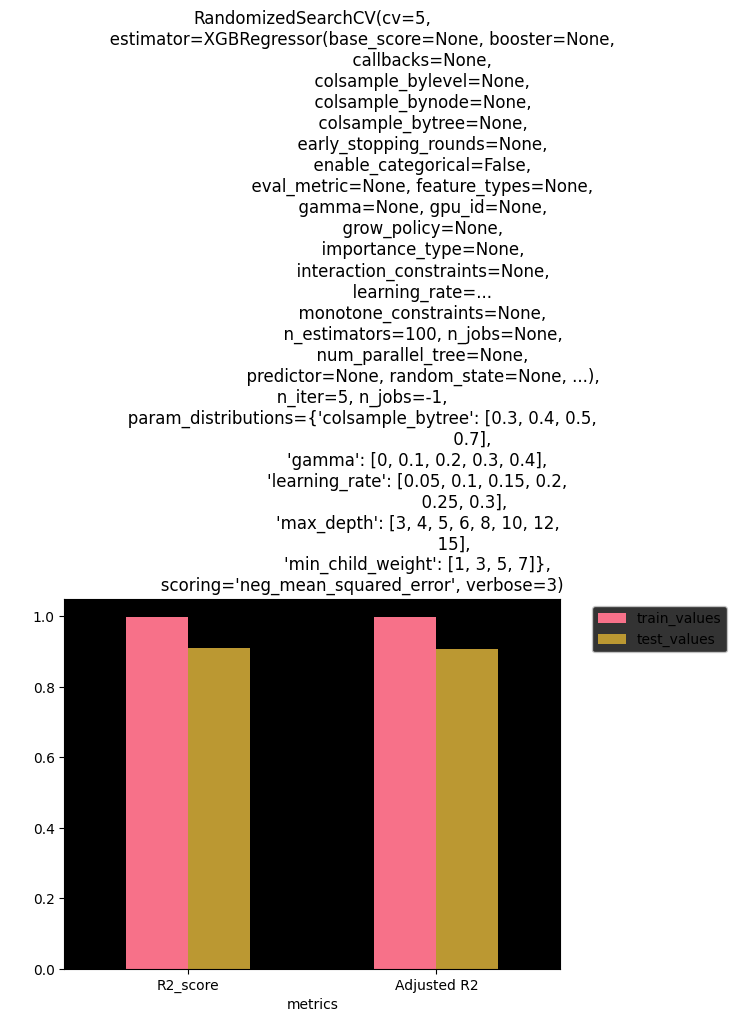

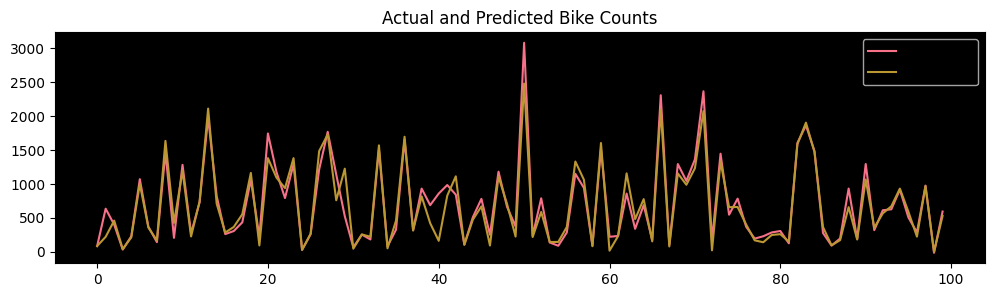

In [481]:
metric_value(random_search,X_train,y_train,X_test,y_test)

#### ML Model - 5

In [482]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [483]:
en = elasticnet.fit(X_train,y_train)
en

ElasticNet(alpha=0.1)

       metrics  train_values  test_values
0     R2_score         0.733        0.706
1  Adjusted R2         0.725        0.696


<Figure size 400x400 with 0 Axes>

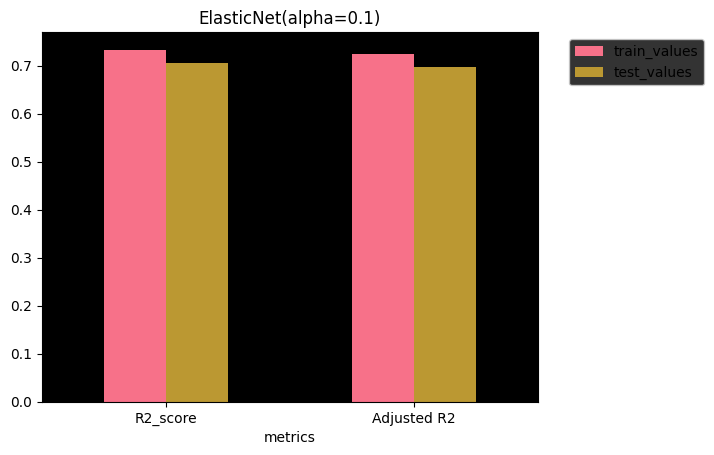

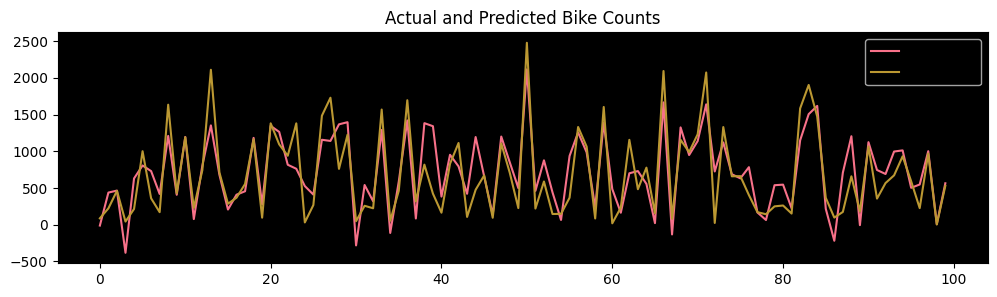

In [484]:
metric_value(en,X_train,y_train,X_test,y_test)

In [485]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Model_Name",'R^2 of train datset',
                       "Adjusted R^2 of train datset",
                       'R^2 of test datset', "Adjusted R^2 of test datset"])

# Add rows
myTable.add_row(["Linear Regression","73%","72%",'70%','69%'])
myTable.add_row(["Lasso Regression","73%","72%",'70%','69%'])
myTable.add_row(["Lasso Regression with GridSearchCV","73%","72%",'70%','69%'])
myTable.add_row(["Ridge Regression","73%","72%",'70%','69%'])
myTable.add_row(["XgBoost with RandomisedSearchCV", "97%","97%",'91%','90%'])
myTable.add_row(["ElasticNet","73%","72%",'70%','69%'])


print(myTable)

+------------------------------------+---------------------+------------------------------+--------------------+-----------------------------+
|             Model_Name             | R^2 of train datset | Adjusted R^2 of train datset | R^2 of test datset | Adjusted R^2 of test datset |
+------------------------------------+---------------------+------------------------------+--------------------+-----------------------------+
|         Linear Regression          |         73%         |             72%              |        70%         |             69%             |
|          Lasso Regression          |         73%         |             72%              |        70%         |             69%             |
| Lasso Regression with GridSearchCV |         73%         |             72%              |        70%         |             69%             |
|          Ridge Regression          |         73%         |             72%              |        70%         |             69%             |

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I have considered R-squared evaluation metric for this problem.

R-square represents the proportion of variance in the model. It is a relative metric which is used to compare with other models trained on the same data. It gives us a rough feel of how well our model is performing.

A model that explains no variance would have an R-square value of 0. A model with R-square value of 1 would explain all of the variance. Higher scores are better. It is also possible for R-square to be negative. Negative scores occur when the predictions that the model makes fit that data worse than the mean of the output values.

# **Conclusion**

* Problem statement was to predict the bike count required at each hour for the stable supply of rental bikes.
* Dataset given to use was clean meaning no null values or duplicate values.
* Changed the name of some of columns for easy understandability.
* Dropped columns that were not necessary.
* Based on our data:
  * The rental bike count during winter season is very less when compared to other seasons.
  * Some of the columns were positively skewed.
  * Most of the variables had outliers.
* Used Yeo-John Transformation to make the data normally distributed.
* Used OneHotEncoding for our categorical variables.
* Used 4 algorithms to test our data:
  * Linear Regression
  * Ridge Regression
  * Lasso Regression
  * XGBoost
  * ElasticNet
* XGBoost when used with best parameters has very good R-Sqaured value and we would be choosing the same for our model.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***